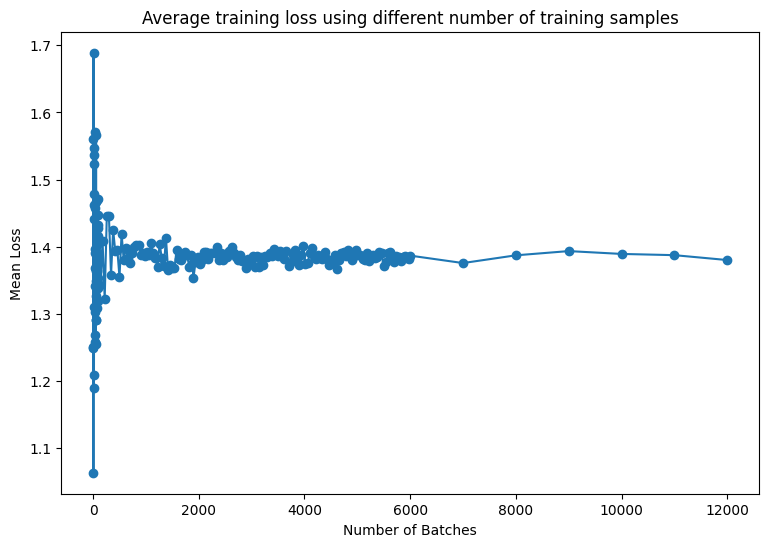

In [12]:
import matplotlib.pyplot as plt
import pickle

with open('./mean_loss_all-train.pkl','rb') as f:
    res = pickle.load(f)

mean_losses = []
for l in res['mean_losses']:
    mean_losses.append(l.to('cpu'))
plt.rcParams['figure.figsize'] = (9,6)
plt.plot(res['batch_nums'], mean_losses, marker='o')
plt.title('Average training loss using different number of training samples')
plt.ylabel('Mean Loss')
plt.xlabel('Number of Batches')
plt.show()

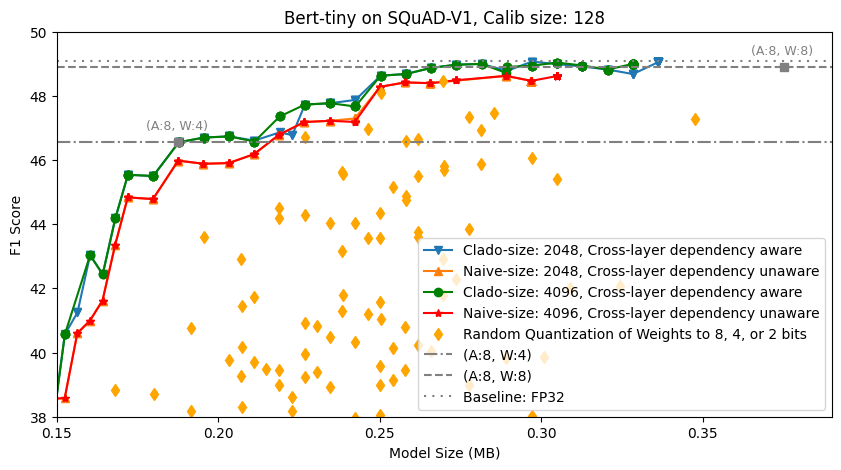

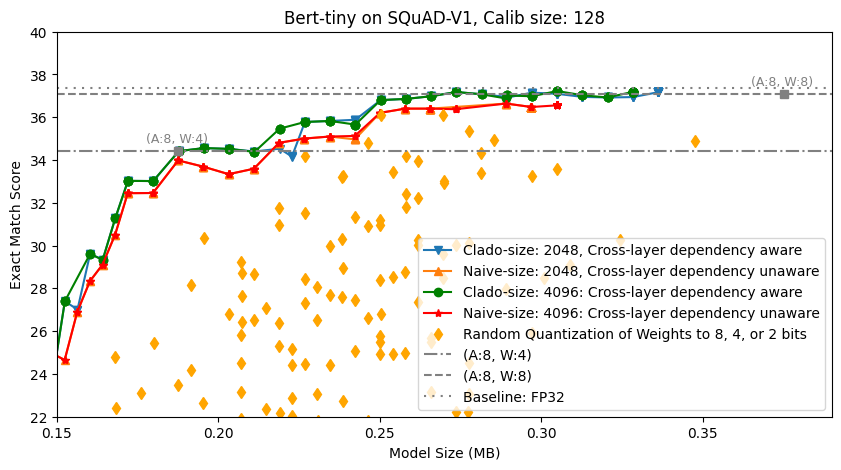

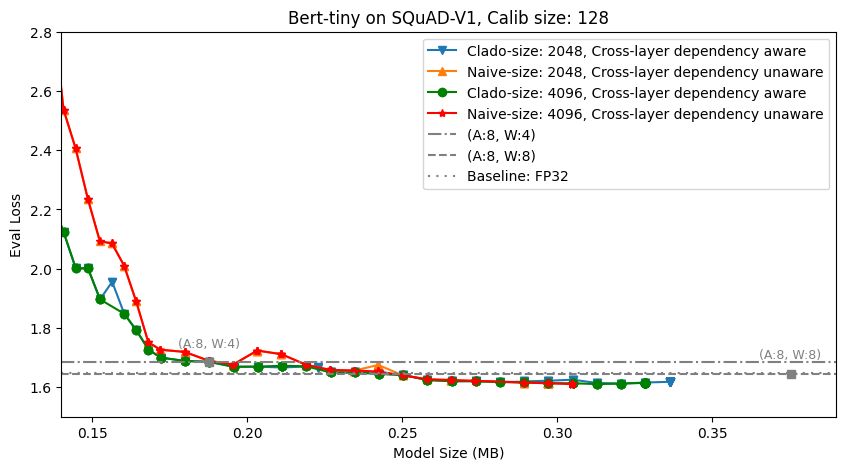

In [15]:
import matplotlib.pyplot as plt
import pickle

with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_Ltilde_2048_eval-loss.pkl','rb') as f:
    res128_2048 = pickle.load(f)
with open('./rand_quant_a8_w8-4-2_calib128.pkl','rb') as f:
    res128_rand_quant = pickle.load(f)

clado_eval_f1_2048, clado_eval_exact_match_2048, clado_eval_loss_2048, clado_size_2048, clado_bitops_2048 = [], [], [], [], []
naive_eval_f1_2048, naive_eval_exact_match_2048, naive_eval_loss_2048, naive_size_2048, naive_bitops_2048 = [], [], [], [], []
rand_quant_eval_f1, rand_quant_eval_exact_match, rand_quant_size, rand_quant_bitops = [], [], [], []


for item in res128_2048['clado_res']:
    eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
    clado_eval_f1_2048.append(eval_f1)
    clado_eval_exact_match_2048.append(eval_exact_match)
    clado_eval_loss_2048.append(eval_loss)
    clado_size_2048.append(size)
    clado_bitops_2048.append(bitops)

for item in res128_2048['naive_res']:
    eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
    naive_eval_f1_2048.append(eval_f1)
    naive_eval_exact_match_2048.append(eval_exact_match)
    naive_eval_loss_2048.append(eval_loss)
    naive_size_2048.append(size)
    naive_bitops_2048.append(bitops)

for item in res128_rand_quant['rand_quant_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    rand_quant_eval_f1.append(eval_f1)
    rand_quant_eval_exact_match.append(eval_exact_match)
    rand_quant_size.append(size)
    rand_quant_bitops.append(bitops)


plt.rcParams['figure.figsize'] = (10,5)
plt.axis([0.15, 0.39, 38, 50])
plt.plot(clado_size_2048,clado_eval_f1_2048,label='Clado-size: 2048, Cross-layer dependency aware',marker='v')
plt.plot(naive_size_2048,naive_eval_f1_2048,label='Naive-size: 2048, Cross-layer dependency unaware',marker='^')
plt.plot(rand_quant_size,rand_quant_eval_f1,label='Random Quantization of Weights to 8, 4, or 2 bits', marker='d', color='orange', linestyle='None')

#plt.plot([0.093811035],[15.237460036722807], color='gray', marker='s')
#plt.annotate("(A:8, W:2)", (0.083811035, 16.037460036722807), size=9, color='gray')
#plt.axhline(y=15.237460036722807, color='gray', linestyle=':', label='(A:8, W:2)')

plt.plot([0.18762207],[46.556981781593855], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.17762207, 46.956981781593855), size=9, color='gray')
plt.axhline(y=46.556981781593855, color='gray', linestyle='-.', label='(A:8, W:4)')

plt.plot([0.375244141],[48.9000], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.365, 49.30), size=9, color='gray')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='(A:8, W:8)')

plt.axhline(y=49.080300956794076, color='gray', linestyle=(0, (1, 3)), label='Baseline: FP32')


plt.title('Bert-tiny on SQuAD-V1, Calib size: 128')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()
plt.show()



plt.axis([0.15, 0.39, 22, 40])
plt.plot(clado_size_2048,clado_eval_exact_match_2048,label='Clado-size: 2048, Cross-layer dependency aware',marker='v')
plt.plot(naive_size_2048,naive_eval_exact_match_2048,label='Naive-size: 2048, Cross-layer dependency unaware',marker='^')
plt.plot(rand_quant_size,rand_quant_eval_exact_match,label='Random Quantization of Weights to 8, 4, or 2 bits', marker='d', color='orange', linestyle='None')

#plt.plot([0.093811035],[5.335856196783349], color='gray', marker='s')
#plt.annotate("(A:8, W:2)", (0.083811035, 5.735856196783349), size=9, color='gray')
#plt.axhline(y=5.335856196783349, color='gray', linestyle=':', label='(A:8, W:2)')

plt.plot([0.18762207],[34.437086092715234], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.17762207, 34.837086092715234), size=9, color='gray')
plt.axhline(y=34.437086092715234, color='gray', linestyle='-.', label='(A:8, W:4)')

plt.plot([0.375244141],[37.095553453169344], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.365, 37.495553453169344), size=9, color='gray')
plt.axhline(y=37.095553453169344, color='gray', linestyle='--', label='(A:8, W:8)')

plt.axhline(y=37.360454115421, color='gray', linestyle=(0, (1, 3)), label='Baseline: FP32')

plt.title('Bert-tiny on SQuAD-V1, Calib size: 128')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (10,5)
plt.axis([0.14, 0.39, 1.5, 2.8])
plt.plot(clado_size_2048,clado_eval_loss_2048,label='Clado-size: 2048, Cross-layer dependency aware',marker='v')
plt.plot(naive_size_2048,naive_eval_loss_2048,label='Naive-size: 2048, Cross-layer dependency unaware',marker='^')


#plt.plot([0.093811035],[3.790600299835205], color='gray', marker='s')
#plt.annotate("(A:8, W:2)", (0.083811035, 3.790600299835205), size=9, color='gray')
#plt.axhline(y=3.790600299835205, color='gray', linestyle=':', label='(A:8, W:2)')

plt.plot([0.18762207],[1.683718204498291], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.17762207, 1.733718204498291), size=9, color='gray')
plt.axhline(y=1.683718204498291, color='gray', linestyle='-.', label='(A:8, W:4)')

plt.plot([0.375244141],[1.6458874940872192], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.365, 1.6958874940872192), size=9, color='gray')
plt.axhline(y=1.6458874940872192, color='gray', linestyle='--', label='(A:8, W:8)')

plt.axhline(y=1.6474617719650269, color='gray', linestyle=(0, (1, 3)), label='Baseline: FP32')


plt.title('Bert-tiny on SQuAD-V1, Calib size: 128')
plt.ylabel('Eval Loss')
plt.xlabel('Model Size (MB)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pickle



batch_nums = [2, 4, 8, 16, 32, 64, 128, 256]
methods = ["clado", "naive", "mpqco"]
for method in methods:
    for batch_num in batch_nums:
        for repeat in range(5):
            n_samples = batch_num * 8
            cmd = f'{method}_eval_f1_{n_samples}_repeat{repeat} = []'
            exec(cmd)
            cmd = f'{method}_eval_exact_match_{n_samples}_repeat{repeat} = []'
            exec(cmd)
            cmd = f'{method}_eval_loss_{n_samples}_repeat{repeat} = []'
            exec(cmd)
            cmd = f'{method}_size_{n_samples}_repeat{repeat} = []'
            exec(cmd)
            cmd = f'{method}_bitops_{n_samples}_repeat{repeat} = []'
            exec(cmd)


for batch_num in batch_nums:
    for repeat in range(4):
        start_batch = batch_num * repeat
        end_batch = batch_num * repeat + batch_num - 1
        n_samples = batch_num * 8
        
        file_name = f'./variance_study/Clado_Naive_MPQCO_res/sample_size{n_samples}/clado_naive_mpqco_a8_w8-4-2_calib128_batches_{start_batch}-{end_batch}_bs8.pkl'
        with open(file_name,'rb') as f:
            res = pickle.load(f) 
        for method in methods:
            for item in eval(f'res["{method}_res"]'):
                eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
                cmd = f'{method}_eval_f1_{n_samples}_repeat{repeat}.append({eval_f1})'
                exec(cmd)
                cmd = f'{method}_eval_exact_match_{n_samples}_repeat{repeat}.append({eval_exact_match})'
                exec(cmd)
                cmd = f'{method}_eval_loss_{n_samples}_repeat{repeat}.append({eval_loss})'
                exec(cmd)
                cmd = f'{method}_size_{n_samples}_repeat{repeat}.append({size})'
                exec(cmd)
                cmd = f'{method}_bitops_{n_samples}_repeat{repeat}.append({bitops})'
                exec(cmd)

batch_nums = [2, 4, 8, 16, 32, 64, 128, 256]
methods = ["clado", "naive", "mpqco"]
size_bounds = np.linspace(0.10,0.40,11)

for batch_num in batch_nums:
    n_samples = batch_num * 8
    plt.rcParams['figure.figsize'] = (10,5)
    plt.axis([0.15, 0.39, 5, 40])
    for method in methods:
        for repeat in range(4):
            plt.plot(eval(f'{method}_size_{n_samples}_repeat{repeat}'), eval(f'{method}_eval_exact_match_{n_samples}_repeat{repeat}'), label=f'{method}_sample-size: {n_samples}, repeat: {repeat}')
    plt.ylabel('Eval Exact match')
    plt.xlabel('Model Size (MB)')
    plt.title(f'Bert-tiny on SQuAD-V1, Calib size: 128, MPQCO-Clado-Naive size: {n_samples}')
    plt.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np



batch_nums = [2, 4, 8, 16, 32, 64, 128, 256]
methods = ["clado", "naive", "mpqco"]
#size_bounds = np.linspace(0.10,0.40,150)
size_bounds = np.linspace(0.10,0.40,11)

n_runs = 5
n_sizes = len(batch_nums)
n_constraints = len(size_bounds)

# n_runs x n_batches x n_constraints 
clado_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)] 
clado_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
clado_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]


for i, batch_num in enumerate(batch_nums):
    for repeat in range(n_runs):
        start_batch = batch_num * repeat
        end_batch = batch_num * repeat + batch_num - 1
        n_samples = batch_num * 8
        file_name = f'./variance_study/Clado_Naive_MPQCO_res_bert_tiny/sample_size{n_samples}/clado_naive_mpqco_a8_w8-4-2_calib128_batches_{start_batch}-{end_batch}_bs8.pkl'
        with open(file_name,'rb') as f:
            res = pickle.load(f)  
        for method in methods:
            j = 0  
            for item in eval(f'res["{method}_res"]'):
                eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
                cmd = f'{method}_f1[repeat][i][j] = {eval_f1}'
                exec(cmd)
                cmd = f'{method}_exact_match[repeat][i][j] = {eval_exact_match}'
                exec(cmd)
                cmd = f'{method}_eval_loss[repeat][i][j] = {eval_loss}'
                exec(cmd)
                j += 1

f1_clado = np.array(clado_f1)
f1_naive = np.array(naive_f1)
f1_mpqco = np.array(mpqco_f1)

xs = 2**np.arange(f1_clado.shape[1]) * 16
for i in range(0, f1_clado.shape[2], 1):
    plt.rcParams['figure.figsize'] = (8,4)
    plt.axis([16, 2048, 11, 50])

    plt.plot(xs, np.quantile(f1_clado[:,:,i],0.5,axis=0),marker='o',label=f'CLADO')
    plt.fill_between(xs,np.quantile(f1_clado[:,:,i],0.75,axis=0),
                     np.quantile(f1_clado[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs, np.quantile(f1_naive[:,:,i],0.5,axis=0),marker='x',label=f'NAIVE')
    plt.fill_between(xs,np.quantile(f1_naive[:,:,i],0.75,axis=0),
                    np.quantile(f1_naive[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs,np.quantile(f1_mpqco[:,:,i],0.5,axis=0),marker='d',label=f'MPQCO')
    plt.fill_between(xs,np.quantile(f1_mpqco[:,:,i],0.75,axis=0),
                     np.quantile(f1_mpqco[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.legend()
    plt.ylabel('Eval F1 Score')
    plt.xlabel('Samples Used')
    plt.title(f'size constraint {size_bounds[i]:.3f}MB')
    plt.xscale('log',base=2)
    plt.show()

In [ ]:
eval_loss_clado = np.array(clado_eval_loss)
eval_loss_naive = np.array(naive_eval_loss)
eval_loss_mpqco = np.array(mpqco_eval_loss)

for i in range(0, f1_clado.shape[2], 1):
    plt.rcParams['figure.figsize'] = (8,4)
    plt.axis([16, 2048, 1.6, 4.3])
    plt.plot(xs, np.quantile(eval_loss_clado[:,:,i],0.5,axis=0),marker='o',label=f'CLADO')
    plt.fill_between(xs,np.quantile(eval_loss_clado[:,:,i],0.75,axis=0),
                     np.quantile(eval_loss_clado[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs, np.quantile(eval_loss_naive[:,:,i],0.5,axis=0),marker='x',label=f'NAIVE')
    plt.fill_between(xs,np.quantile(eval_loss_naive[:,:,i],0.75,axis=0),
                    np.quantile(eval_loss_naive[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs,np.quantile(eval_loss_mpqco[:,:,i],0.5,axis=0),marker='d',label=f'MPQCO')
    plt.fill_between(xs,np.quantile(eval_loss_mpqco[:,:,i],0.75,axis=0),
                     np.quantile(eval_loss_mpqco[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.legend()
    plt.ylabel('Eval Loss')
    plt.xlabel('Samples Used')
    plt.title(f'size constraint {size_bounds[i]:.3f}MB')
    plt.xscale('log',base=2)
    plt.show()

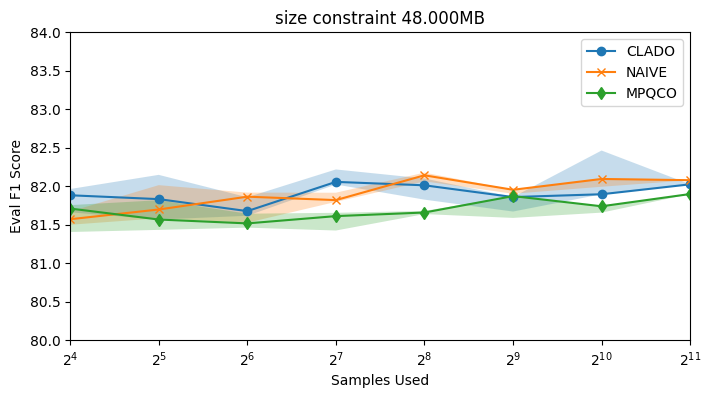

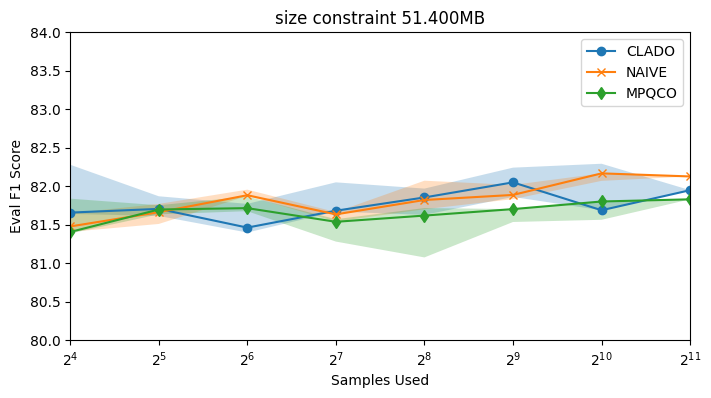

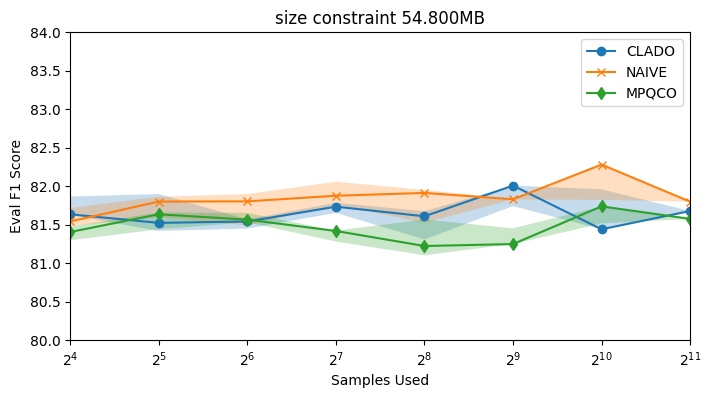

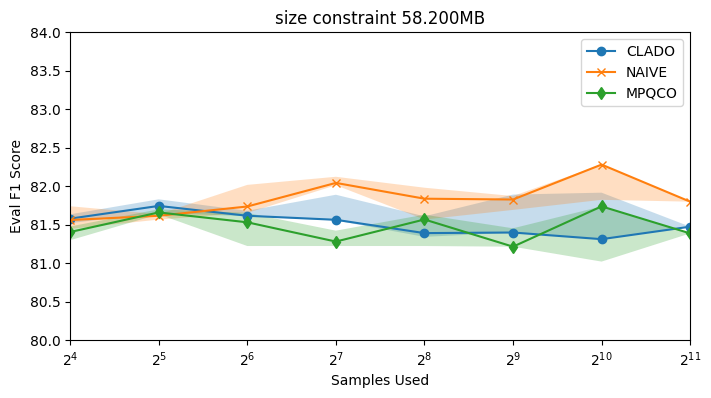

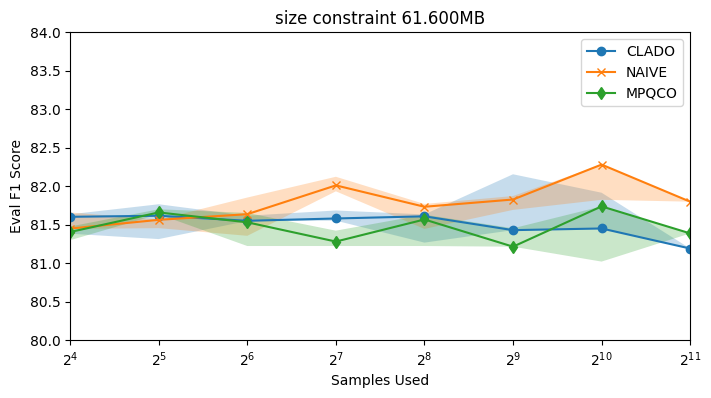

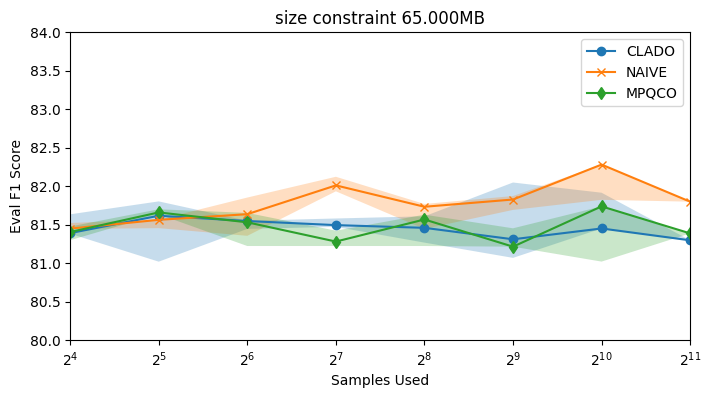

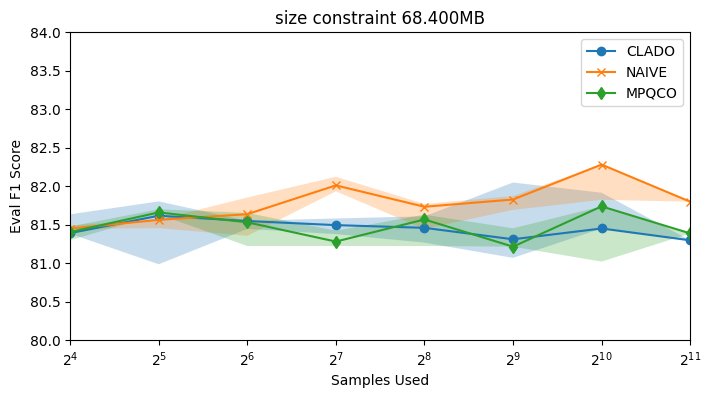

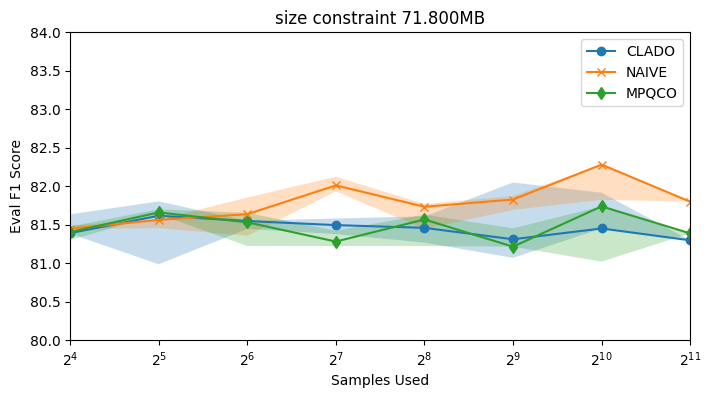

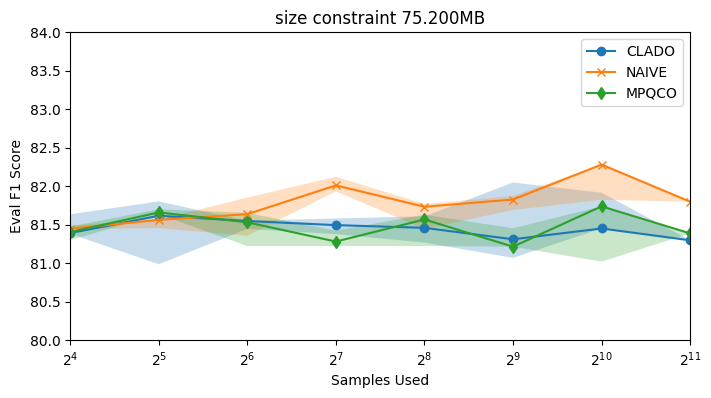

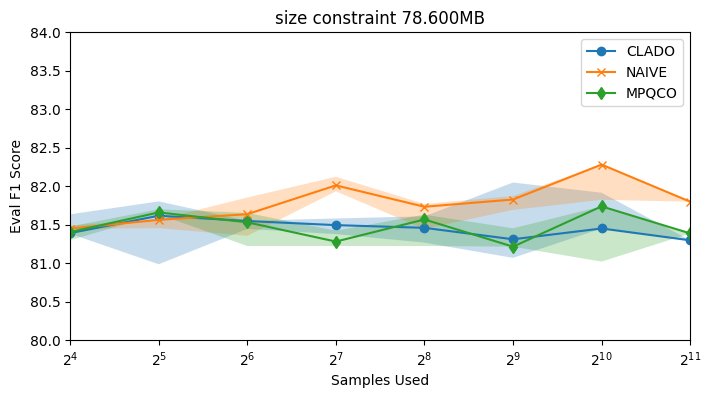

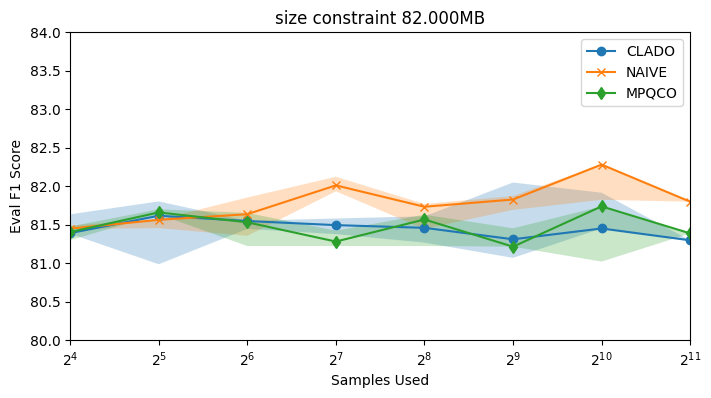

In [8]:
import matplotlib.pyplot as plt
import pickle
import numpy as np



batch_nums = [2, 4, 8, 16, 32, 64, 128, 256]
methods = ["clado", "naive", "mpqco"]
size_bounds = np.linspace(48, 82, 11)

n_runs = 5
n_sizes = len(batch_nums)
n_constraints = len(size_bounds)

# n_runs x n_batches x n_constraints 
clado_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)] 
clado_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
clado_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]


for i, batch_num in enumerate(batch_nums):
    for repeat in range(n_runs):
        start_batch = batch_num * repeat
        end_batch = batch_num * repeat + batch_num - 1
        n_samples = batch_num * 8
        if n_samples == 512: # There are 4 runs, repeat the last run two times
            if start_batch == 256:
                start_batch = 192
                end_batch = 255
        elif n_samples == 1024: #there are only two runs, repeat each run two times 
            if start_batch == 256:
                start_batch = 0
                end_batch = start_batch + 127
            elif start_batch == 384:
                start_batch = 128
                end_batch = start_batch + 127
            elif start_batch == 512:
                start_batch = 0
                end_batch = start_batch + 127        
                
        elif n_samples == 2048: #there is only one run, repeat it 5 times
            start_batch = 0
            end_batch = 255
    
        file_name = f'./variance_study/Clado_Naive_MPQCO_res_bert_base/sample_size{n_samples}/clado_naive_mpqco_a8_w8-4_calib128_batches_{start_batch}-{end_batch}_bs8_size-bound.pkl'
        with open(file_name,'rb') as f:
            res = pickle.load(f)  
        for method in methods:
            j = 0  
            for item in eval(f'res["{method}_res"]'):
                eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
                cmd = f'{method}_f1[repeat][i][j] = {eval_f1}'
                exec(cmd)
                cmd = f'{method}_exact_match[repeat][i][j] = {eval_exact_match}'
                exec(cmd)
                cmd = f'{method}_eval_loss[repeat][i][j] = {eval_loss}'
                exec(cmd)
                j += 1

f1_clado = np.array(clado_f1)
f1_naive = np.array(naive_f1)
f1_mpqco = np.array(mpqco_f1)

xs = 2**np.arange(f1_clado.shape[1]) * 16
for i in range(0, f1_clado.shape[2], 1):
    plt.rcParams['figure.figsize'] = (8,4)
    plt.axis([16, 2048, 80, 84])

    plt.plot(xs, np.quantile(f1_clado[:,:,i],0.5,axis=0),marker='o',label=f'CLADO')
    plt.fill_between(xs,np.quantile(f1_clado[:,:,i],0.75,axis=0),
                     np.quantile(f1_clado[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs, np.quantile(f1_naive[:,:,i],0.5,axis=0),marker='x',label=f'NAIVE')
    plt.fill_between(xs,np.quantile(f1_naive[:,:,i],0.75,axis=0),
                    np.quantile(f1_naive[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs,np.quantile(f1_mpqco[:,:,i],0.5,axis=0),marker='d',label=f'MPQCO')
    plt.fill_between(xs,np.quantile(f1_mpqco[:,:,i],0.75,axis=0),
                     np.quantile(f1_mpqco[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.legend()
    plt.ylabel('Eval F1 Score')
    plt.xlabel('Samples Used')
    plt.title(f'size constraint {size_bounds[i]:.3f}MB')
    plt.xscale('log',base=2)
    plt.show()